#**Section 1. Introduction to the Problem/Task and Dataset**

In this project, we focus on analyzing employment data to predict the employment status of individuals based on various socio-economic and demographic factors. The dataset used for this study is derived from the April 2016 Labor Force Survey (LFS) Public Use File. This dataset contains a wide range of variables related to employment, work conditions, and job-seeking behavior.

Employment status prediction is a crucial task in labor market analysis, as it provides insights into employment trends and workforce participation. By leveraging machine learning techniques, we aim to classify individuals into different employment categories and identify the key factors influencing employment. This study will also help policymakers and labor economists understand job market trends and make informed decisions.

Our approach includes data preprocessing, feature selection, model training, evaluation, and comparison of different machine learning models. Specifically, we will explore classification models to determine the most suitable algorithm for predicting employment status.

#**Section 2. Description of the Dataset**

### Data Collection Process

The dataset used in this project is the **Labor Force Survey (LFS) April 2016 Public Use File (PUF)**. It contains data on household members aged **15 years and older**, covering employment status, industry, class of worker, hours worked, and job search methods.

- **Collection Method:** Face-to-face interviews conducted by PSA
- **Survey Period:** April 8 to April 30, 2016
- **Sampling Design:** Multi-stage sampling using the **2013 Master Sample Design**
- **Total Households Surveyed:** 42,768 (excluding institutional populations)
- **Response Rate:** 95.7%

The survey was structured to provide **national and regional labor statistics**. Data was manually processed, coded, and verified for consistency.

### Dataset Structure

Each row in the dataset represents an **individual** (person) surveyed, while each column represents a **feature** describing their demographic or employment-related attributes.

- **Total Households Sampled:** 42,768
- **Primary Unit of Analysis:** Individuals aged 15 and above
- **Dataset Format:** CSV file with metadata dictionary in an accompanying Excel file

### Key Features

- **Demographic Information**
  - `PUFREG`: Region
  - `PUFPRV`: Province Code
  - `PUFHHSIZE`: Number of Household Members
  - `PUFC04_SEX`: Sex
  - `PUFC05_AGE`: Age
  - `PUFC07_GRADE`: Highest Grade Completed

- **Employment Status & Work Details**
  - `PUFC11_WORK`: Did the person work in the past week?
  - `PUFC14_PROCC`: Primary Occupation
  - `PUFC16_PKB`: Industry of Employment
  - `PUFC17_NATEM`: Nature of Employment
  - `PUFC18_PNWHRS`: Normal Working Hours per Day

- **Job Search Information**
  - `PUFC30_LOOKW`: Did the person look for work in the past week?
  - `PUFC32_JOBSM`: Job Search Method
  - `PUFC33_WEEKS`: Number of Weeks Looking for Work

### Implications of Data Collection

The survey’s reliance on self-reported responses introduces potential biases, such as recall errors or underreporting of informal employment. However, the **multi-stage sampling design and quality control measures** implemented by PSA ensure that the dataset remains a **reliable** source for labor market analysis.


#**Section 3. List of requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss
from scipy.stats import loguniform
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

#**Section 4. Data preprocessing and cleaning**

##Loading the Dataset

In [ ]:
file_name = "LFS PUF April 2016.CSV"
df = pd.read_csv(file_name)

##Reading the Contents of Dataset

df.info() was used in order to provide a summary of the dataset. The summary includes: Number of non-null values in each column, data types of each column (e.g., int64, float64, object), and memory usage.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

Next df.head(5) was used to view the first 5 rows of the dataset in order to check if the dataset was loaded properly.

In [ ]:
df.head(5)

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


##Cleaning the Data

We begin this section by checking for duplicate rows.

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


As shown above, there are no duplicate rows, indicating that each entry in the dataset is unique

We continued cleaning the dataset by dropping uneccessary columns, these columns are mostly survey data such as survey month, survey year, number of household members. We determined that these columns do not contribute meaningful information to the modeling process and our specific classification task, which led us to dropping them.

In [ ]:
columns_to_drop = ["PUFPSU", #psu number
                   "PUFRPL", #replicate
                   "PUFSVYMO",
                   "PUFSVYYR",
                   "PUFPRRCD",
                   "PUFPRV",
                   "PUFHHNUM"]

df.drop(columns=columns_to_drop, inplace=True)

We then checked for missing or empty string values per column. Specifically we first calculated the number of missing (NaN) values in each column using df.isna().sum(). Then, we checked for whitespace-only strings in text columns by applying a function that strips whitespace and counts empty strings, ensuring that numeric columns are ignored. The results are then stored in a new dataframe called summary_df.

In [ ]:
missing_counts = df.isna().sum()
whitespace_counts = df.apply(lambda col: (col.str.strip() == "").sum() if col.dtype == "object" else 0)
summary_df = pd.DataFrame({
    "Missing Values": missing_counts,
    "Whitespace/Empty Strings": whitespace_counts
})
print(summary_df)

                 Missing Values  Whitespace/Empty Strings
PUFREG                        0                         0
PUFURB2K10                    0                         0
PUFPWGTFIN                    0                         0
PUFHHSIZE                     0                         0
PUFC01_LNO                    0                         0
PUFC03_REL                    0                         0
PUFC04_SEX                    0                         0
PUFC05_AGE                    0                         0
PUFC06_MSTAT                  0                     18339
PUFC07_GRADE                  0                     18339
PUFC08_CURSCH                 0                    107137
PUFC09_GRADTECH               0                     57782
PUFC10_CONWR                  0                     57782
PUFC11_WORK                   0                     21894
PUFC12_JOB                    0                     93306
PUFC14_PROCC                  0                    108360
PUFC16_PKB    

Upon checking the first 10 rows, whitespaces are present in some of the columns.
As seen above, there are no missing values, but there are whitespaces present in some of the columns, which is why some of the columns are object data types. To handle this, we will remove the leading spaces from all values and then convert object columns to numerical values in the later cells.

We then implemented code to inspect the data types in the dataset. Inspecting data types ensures each column is correctly formatted for analysis. It helps detect numerical data stored as text, prevents errors in calculations, and optimizes storage. Identifying incorrect types early allows for proper conversions, ensuring smooth data processing and analysis.

In [ ]:
print("\nData Types in the Dataset:")
print(df.dtypes)


Data Types in the Dataset:
PUFREG               int64
PUFURB2K10           int64
PUFPWGTFIN         float64
PUFHHSIZE            int64
PUFC01_LNO           int64
PUFC03_REL           int64
PUFC04_SEX           int64
PUFC05_AGE           int64
PUFC06_MSTAT        object
PUFC07_GRADE        object
PUFC08_CURSCH       object
PUFC09_GRADTECH     object
PUFC10_CONWR        object
PUFC11_WORK         object
PUFC12_JOB          object
PUFC14_PROCC        object
PUFC16_PKB          object
PUFC17_NATEM        object
PUFC18_PNWHRS       object
PUFC19_PHOURS       object
PUFC20_PWMORE       object
PUFC21_PLADDW       object
PUFC22_PFWRK        object
PUFC23_PCLASS       object
PUFC24_PBASIS       object
PUFC25_PBASIC       object
PUFC26_OJOB         object
PUFC27_NJOBS        object
PUFC28_THOURS       object
PUFC29_WWM48H       object
PUFC30_LOOKW        object
PUFC31_FLWRK        object
PUFC32_JOBSM        object
PUFC33_WEEKS        object
PUFC34_WYNOT        object
PUFC35_LTLOOKW      object


Checking unique values in selected columns helps identify inconsistencies, unexpected categories, or formatting issues. Stripping whitespace ensures accurate detection of unique values, preventing duplicates caused by extra spaces. This step is crucial for spotting data entry errors, standardizing categorical values, and determining if certain columns need cleaning or transformation before analysis.

In [ ]:
columns_to_check = [
    "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC08_CURSCH", "PUFC09_GRADTECH", "PUFC10_CONWR", "PUFC11_WORK", "PUFC12_JOB",
    "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM", "PUFC18_PNWHRS", "PUFC19_PHOURS",
    "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC22_PFWRK", "PUFC23_PCLASS", "PUFC24_PBASIS",
    "PUFC25_PBASIC", "PUFC26_OJOB", "PUFC27_NJOBS", "PUFC28_THOURS", "PUFC29_WWM48H",
    "PUFC30_LOOKW", "PUFC31_FLWRK", "PUFC32_JOBSM", "PUFC33_WEEKS", "PUFC34_WYNOT",
    "PUFC35_LTLOOKW", "PUFC36_AVAIL", "PUFC37_WILLING", "PUFC38_PREVJOB", "PUFC40_POCC",
    "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT"
]

for col in columns_to_check:
    print(f"\n🔍 Unique values in {col}:")
    print(df[col].astype(str).str.strip().unique())  # Strip leading/trailing spaces before printing


🔍 Unique values in PUFC06_MSTAT:
['2' '1' '' '3' '4' '6' '5']

🔍 Unique values in PUFC07_GRADE:
['350' '320' '250' '' '622' '672' '240' '220' '614' '330' '010' '280'
 '632' '310' '000' '900' '820' '230' '589' '572' '210' '830' '810' '634'
 '686' '581' '681' '552' '534' '840' '658' '548' '648' '652' '662' '601'
 '642' '562' '260' '685' '631' '684' '340' '584' '621' '410' '420' '664'
 '676' '521' '638' '554' '646' '689' '522' '654' '644' '532' '531' '514'
 '558' '501' '586' '542' '576' '544' '585' '564']

🔍 Unique values in PUFC08_CURSCH:
['' '2' '1']

🔍 Unique values in PUFC09_GRADTECH:
['2' '' '1']

🔍 Unique values in PUFC10_CONWR:
['5' '' '1' '2' '4' '3']

🔍 Unique values in PUFC11_WORK:
['1' '2' '']

🔍 Unique values in PUFC12_JOB:
['' '2' '1']

🔍 Unique values in PUFC14_PROCC:
['61' '92' '91' '52' '' '53' '13' '54' '93' '12' '71' '11' '83' '14' '51'
 '33' '44' '75' '42' '34' '96' '22' '62' '23' '72' '26' '41' '21' '43'
 '24' '74' '31' '82' '35' '94' '73' '25' '32' '81' '95' '02' '01

We then specifized which columns were categorical or numerical for the later steps.

In [ ]:
categorical_data = [
    "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC08_CURSCH", "PUFC09_GRADTECH", "PUFC10_CONWR",
    "PUFC11_WORK", "PUFC12_JOB", "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM",
    "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC22_PFWRK", "PUFC23_PCLASS", "PUFC24_PBASIS",
    "PUFC26_OJOB", "PUFC29_WWM48H", "PUFC30_LOOKW", "PUFC31_FLWRK", "PUFC32_JOBSM",
    "PUFC34_WYNOT", "PUFC35_LTLOOKW", "PUFC36_AVAIL", "PUFC37_WILLING", "PUFC38_PREVJOB",
    "PUFC40_POCC", "PUFC41_WQTR", "PUFC43_QKB"
]

numerical_data = [
    "PUFC18_PNWHRS", "PUFC19_PHOURS", "PUFC25_PBASIC", "PUFC27_NJOBS",
    "PUFC28_THOURS", "PUFC33_WEEKS"
]

This following code cleans selected columns by standardizing their formatting and ensuring correct data types. It removes leading/trailing spaces, eliminates leading zeros, and replaces empty strings with NaN to handle missing values properly. Additionally, it converts specific columns to numeric format, ensuring they can be used in calculations without errors. The final portion of this cell prints unique values for the "PUFNEWEMPSTAT" column, verifying that the cleaning process was applied correctly.

In [ ]:
columns_to_clean = [
    "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC08_CURSCH", "PUFC09_GRADTECH", "PUFC10_CONWR",
    "PUFC11_WORK", "PUFC12_JOB", "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM",
    "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC22_PFWRK", "PUFC23_PCLASS", "PUFC24_PBASIS",
    "PUFC26_OJOB", "PUFC29_WWM48H", "PUFC30_LOOKW", "PUFC31_FLWRK", "PUFC32_JOBSM",
    "PUFC34_WYNOT", "PUFC35_LTLOOKW", "PUFC36_AVAIL", "PUFC37_WILLING", "PUFC38_PREVJOB",
    "PUFC40_POCC", "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT",
    "PUFC18_PNWHRS", "PUFC19_PHOURS", "PUFC25_PBASIC", "PUFC27_NJOBS",
    "PUFC28_THOURS", "PUFC33_WEEKS"
 ]

df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.astype(str)
                                                     .str.strip()  # Remove leading/trailing spaces
                                                     .str.lstrip('0')  # Remove leading zeros
                                                     .replace("", np.nan)  # Replace empty strings with NaN
                                                  )

numerical_columns = ["PUFC18_PNWHRS", "PUFC19_PHOURS", "PUFC25_PBASIC", "PUFC27_NJOBS", "PUFC28_THOURS", "PUFC33_WEEKS"]
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

df[numerical_data] = df[numerical_data].apply(pd.to_numeric, errors='coerce')

print(df["PUFNEWEMPSTAT"].unique())


['1' '3' nan '2']


The next step is to perform imputation on the empty strings that were turned into NaN. This is done by the following cells.

This next cell fills missing values (former empty strings) in categorical columns with the most frequent value (mode). It first checks if the column exists in the dataframe, then calculates the mode. If a mode is found, missing values (NaN) are replaced with it.

In [ ]:
for col in categorical_data:
    if col in df.columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value.iloc[0])

This is followed by filling missing values (former empty strings) in numerical columns using the median value. It first identifies numeric columns, excluding "PUFNEWEMPSTAT", and then applies SimpleImputer with the median strategy.

In [ ]:
num_imputer = SimpleImputer(strategy="median")
exclude_col = "PUFNEWEMPSTAT"
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col != exclude_col]

df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

In [ ]:
print(df["PUFNEWEMPSTAT"].unique())

['1' '3' nan '2']


This cell was to check the unique values present in the column "PUFNEWEMPSTAT" which is the column we are planning on using as the target column in the model training portion of the project.

Once again df.info(), df.head(10) and print(df.dtypes) was run to allow us to double check the contents of the updated dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  float64
 1   PUFURB2K10       180862 non-null  float64
 2   PUFPWGTFIN       180862 non-null  float64
 3   PUFHHSIZE        180862 non-null  float64
 4   PUFC01_LNO       180862 non-null  float64
 5   PUFC03_REL       180862 non-null  float64
 6   PUFC04_SEX       180862 non-null  float64
 7   PUFC05_AGE       180862 non-null  float64
 8   PUFC06_MSTAT     180862 non-null  object 
 9   PUFC07_GRADE     180862 non-null  object 
 10  PUFC08_CURSCH    180862 non-null  object 
 11  PUFC09_GRADTECH  180862 non-null  object 
 12  PUFC10_CONWR     180862 non-null  object 
 13  PUFC11_WORK      180862 non-null  object 
 14  PUFC12_JOB       180862 non-null  object 
 15  PUFC14_PROCC     180862 non-null  object 
 16  PUFC16_PKB       180862 non-null  obje

In [ ]:
df.head(10)

,PUFREG,PUFURB2K10,PUFPWGTFIN,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1.0,2.0,405.2219,3.0,1.0,1.0,1.0,49.0,2,350,...,2.0,7,1,1,1,1,52,1,1,1
1,1.0,2.0,388.8280,3.0,2.0,2.0,2.0,61.0,2,350,...,2.0,7,1,1,1,1,52,1,1,1
2,1.0,2.0,406.1194,3.0,3.0,3.0,1.0,19.0,1,350,...,2.0,7,1,1,1,1,52,1,1,1
3,1.0,2.0,405.2219,4.0,1.0,1.0,1.0,48.0,2,320,...,2.0,7,1,1,1,1,52,1,1,1
4,1.0,2.0,384.3556,4.0,2.0,2.0,2.0,41.0,2,350,...,2.0,7,1,1,1,1,52,1,96,1
5,1.0,2.0,406.1194,4.0,3.0,3.0,1.0,20.0,1,350,...,2.0,7,1,1,1,1,52,1,1,1
6,1.0,2.0,371.9331,4.0,4.0,3.0,2.0,15.0,1,320,...,2.0,8,1,1,1,2,52,1,1,3
7,1.0,2.0,383.9971,4.0,1.0,1.0,1.0,59.0,2,350,...,2.0,7,1,1,1,1,52,1,1,1
8,1.0,2.0,388.8280,4.0,2.0,2.0,2.0,61.0,2,350,...,2.0,7,1,1,1,1,52,1,84,1
9,1.0,2.0,394.5008,4.0,3.0,6.0,2.0,11.0,1,250,...,2.0,7,1,1,1,1,52,1,1,NaN


In [ ]:
print("\nData Types in the Dataset:")
print(df.dtypes)


Data Types in the Dataset:
PUFREG             float64
PUFURB2K10         float64
PUFPWGTFIN         float64
PUFHHSIZE          float64
PUFC01_LNO         float64
PUFC03_REL         float64
PUFC04_SEX         float64
PUFC05_AGE         float64
PUFC06_MSTAT        object
PUFC07_GRADE        object
PUFC08_CURSCH       object
PUFC09_GRADTECH     object
PUFC10_CONWR        object
PUFC11_WORK         object
PUFC12_JOB          object
PUFC14_PROCC        object
PUFC16_PKB          object
PUFC17_NATEM        object
PUFC18_PNWHRS      float64
PUFC19_PHOURS      float64
PUFC20_PWMORE       object
PUFC21_PLADDW       object
PUFC22_PFWRK        object
PUFC23_PCLASS       object
PUFC24_PBASIS       object
PUFC25_PBASIC      float64
PUFC26_OJOB         object
PUFC27_NJOBS       float64
PUFC28_THOURS      float64
PUFC29_WWM48H       object
PUFC30_LOOKW        object
PUFC31_FLWRK        object
PUFC32_JOBSM        object
PUFC33_WEEKS       float64
PUFC34_WYNOT        object
PUFC35_LTLOOKW      object


**CLASSIFICATION TASK**: Predicting Employment Status (employed or unemployed) based off demographic, education-related, location and job-related variables

Based off our classification task, the label we would need to predict is the PUFNEWEMPSTAT variable, where:
* 1 indicates the person is Employed
* 2 indicates the person is Unemployed
* 3 indicates the person is Not in the Workforce

We later decided to merge 2 and 3.

This next cell removes rows where the "PUFNEWEMPSTAT" column has missing values (NaN). The dropna(subset=["PUFNEWEMPSTAT"], inplace=True) function ensures that only rows with valid values in this column remain. After dropping the missing values, df.shape returns the updated dimensions of the DataFrame, showing the number of remaining rows and columns.

In [ ]:
df.dropna(subset=["PUFNEWEMPSTAT"], inplace=True)
df.shape

(119525, 43)

We then check the unique values in the "PUFNEWEMPSTAT" column.

In [ ]:
print(df["PUFNEWEMPSTAT"].unique())

['1' '3' '2']


We merge classes 2 (unemployed) and 3 (not in the labor force) to simplify model training and align with our objective of predicting employment status (employed vs. not employed). This approach is justified because both categories represent individuals without paid work, regardless of job-search activity—a distinction irrelevant to our use case. Empirical support for this merge comes from:

* Labor economics research showing fluid boundaries between these states, particularly for discouraged workers (Kudlyak & Schwartzman, 2012) and

* Machine learning applications that aggregate these categories when predicting economic inactivity ( Liu & Li, 2022 ; Philippines DOLE Report, 2022);

In [ ]:
df['PUFNEWEMPSTAT'] = df['PUFNEWEMPSTAT'].map({'1': '1', '2': '2', '3': '2'})
print(f"After merge: {df['PUFNEWEMPSTAT'].value_counts()}")
print(pd.unique(df['PUFNEWEMPSTAT']).tolist())

After merge: PUFNEWEMPSTAT
1    71355
2    48170
Name: count, dtype: int64
['1', '2']


This next cell changes object columns into integers. This was done as columns need to be represented as integers for modeling or computations.

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(int)

#**Section 5. Exploratory Data Analysis**

This first thing we did to explore the data is to generate a summary statistics report for numerical columns in the DataFrame. The df.describe() function provides key metrics such as count, mean, standard deviation, minimum, and maximum values, along with quartiles (25%, 50%, 75%). This helped us in understanding data distribution, detecting outliers, and identifying potential issues before further analysis.

In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              PUFREG     PUFURB2K10     PUFPWGTFIN      PUFHHSIZE  \
count  119525.000000  119525.000000  119525.000000  119525.000000   
mean        9.365070       1.559222     570.313699       5.259711   
std         4.659607       0.496482     510.808245       2.391947   
min         1.000000       1.000000      34.998400       1.000000   
25%         5.000000       1.000000     243.022800       4.000000   
50%        10.000000       2.000000     386.822500       5.000000   
75%        13.000000       2.000000     695.378900       7.000000   
max        17.000000       2.000000    4509.316000      23.000000   

          PUFC01_LNO     PUFC03_REL     PUFC04_SEX     PUFC05_AGE  \
count  119525.000000  119525.000000  119525.000000  119525.000000   
mean        2.513181       2.541184       1.499670      37.661309   
std         1.736895       1.866868       0.500002      17.051686   
min         1.000000       1.000000       1.000000      15.000000   
25%         

##Visualizing the Data via Diagrams and Charts

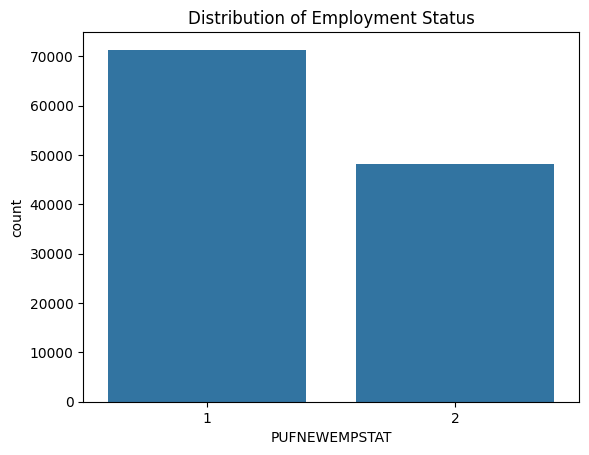

In [ ]:
sns.countplot(x=df["PUFNEWEMPSTAT"])
plt.title("Distribution of Employment Status")
plt.show()

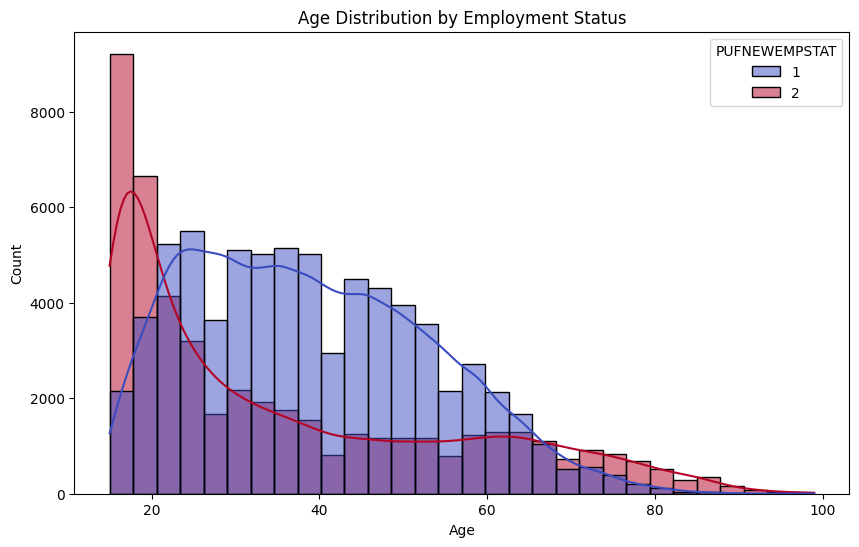

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PUFC05_AGE", hue="PUFNEWEMPSTAT", kde=True, bins=30, palette="coolwarm")
plt.title("Age Distribution by Employment Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The graph shows employed individuals peak between ages 20-60 and drop after retirement age, while unemployed/not-in-workforce individuals are more common among younger (20-30) and older (60+) age groups, with counts flipping around age 60.

<ipython-input-39-36430c29db49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="PUFNEWEMPSTAT", y="PUFC19_PHOURS", palette="Set2")


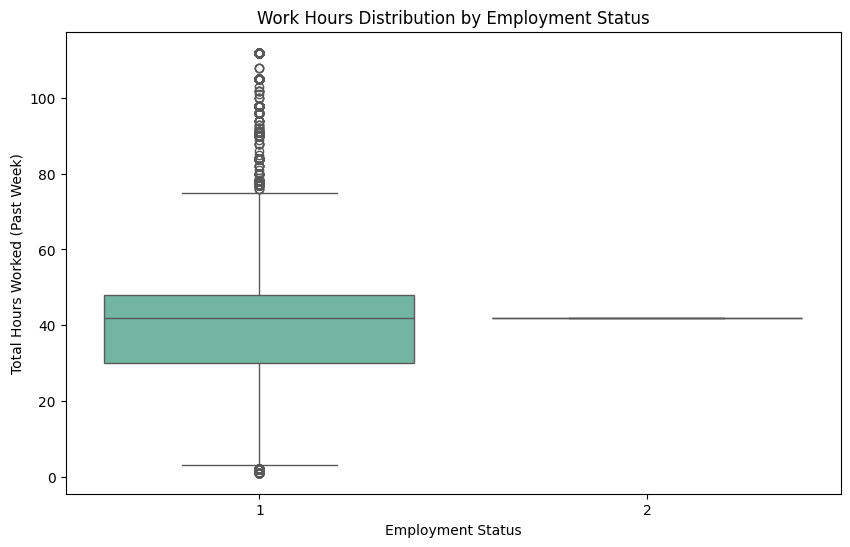

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="PUFNEWEMPSTAT", y="PUFC19_PHOURS", palette="Set2")
plt.title("Work Hours Distribution by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Total Hours Worked (Past Week)")
plt.show()

The graph shows nearly all unemployed individuals have 0 work hours, while employed individuals cluster around 20-60 hours.

### Correlation Heatmap

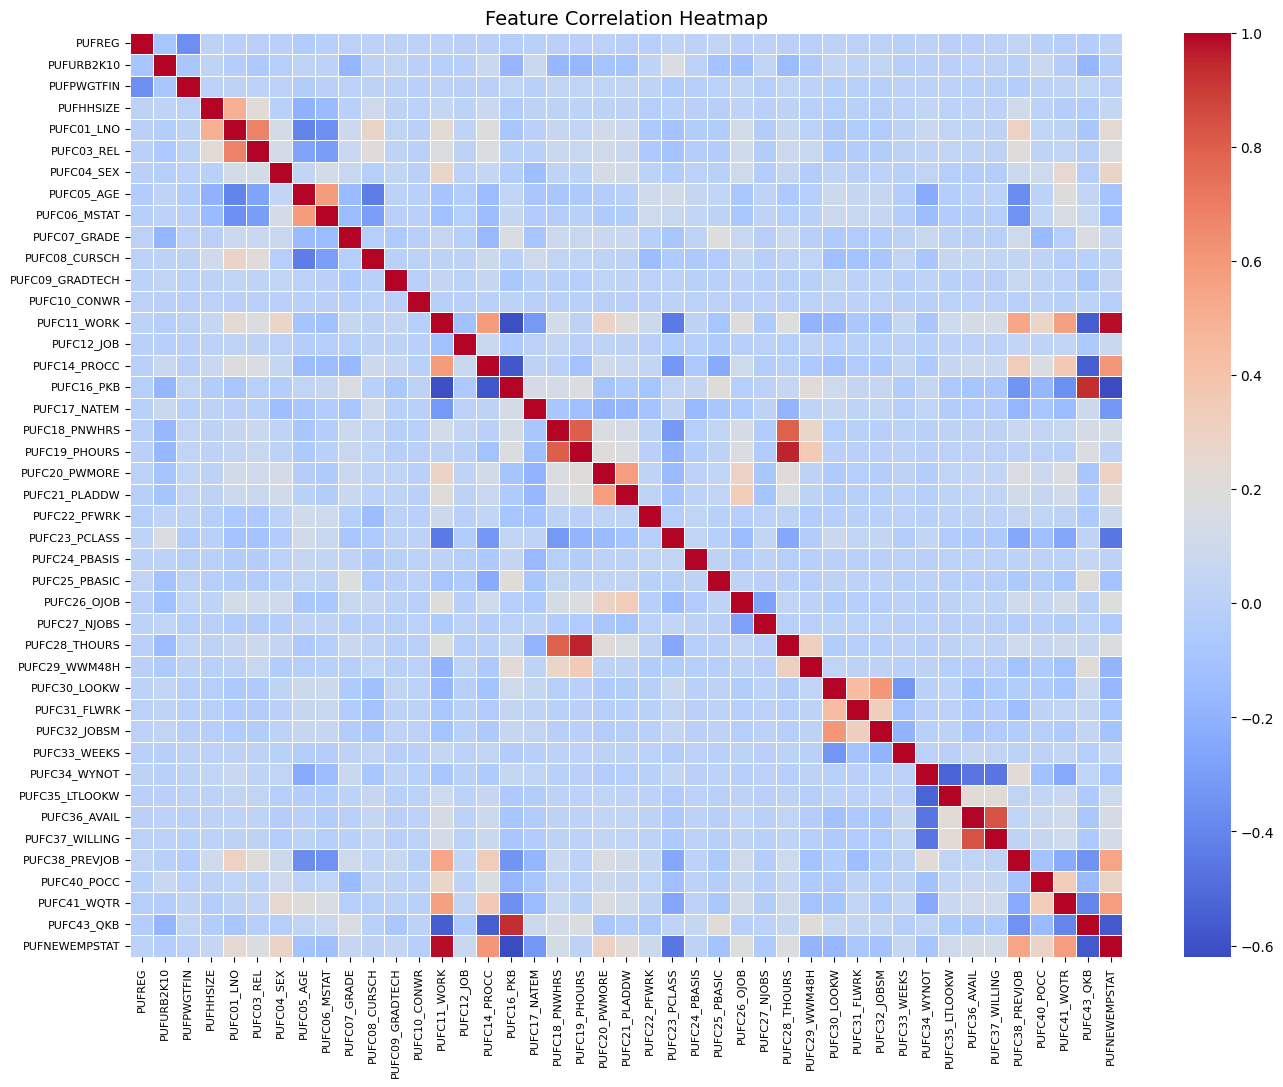

<Axes: >

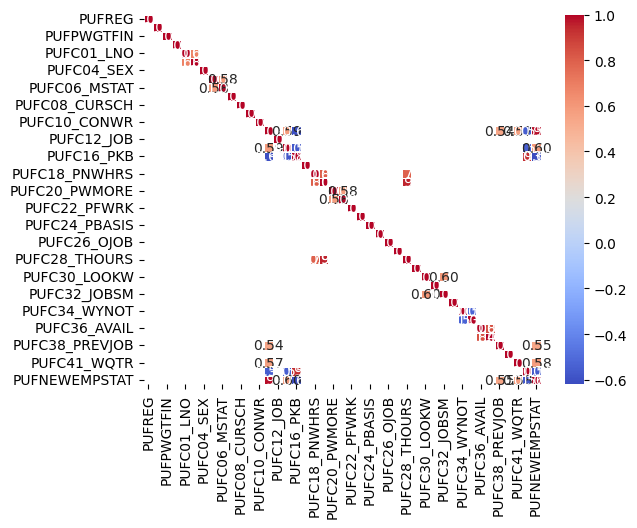

In [ ]:
plt.figure(figsize=(16, 12))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

threshold = 0.5
filtered_corr = corr_matrix[abs(corr_matrix) > threshold]
sns.heatmap(filtered_corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

Strong positive correlations exist between:

* PUFCL1_WORK (work status), PUFCL2_JOB (job type), and PUFCL8_PRWHRS/PUFCL9_PHOURS (working hours).

* PUFC28_THOURS (total hours worked) and PUFC29_VWMMSH (voluntary work hours).

* Interpretation: Employed individuals consistently show high correlations among work status, job type, and hours worked, as expected.

Strong negative correlations with:

* PUFCL1_WORK (work status), PUFCL9_PHOURS (hours worked), and PUFC28_THOURS (total hours).

* Interpretation: Unemployed (label=2) or NLF (label=3) individuals have near-zero working hours, while employed (label=1) individuals show higher values.

The following columns "PUFC43_QKB", "PUFC11_WORK" and "PUFC28_THOURS" were dropped as based on the heatmap they had high correlation to another feature that could potentially be used as a predictor.

In [ ]:
columns_to_drop = ["PUFC43_QKB", 'PUFC11_WORK','PUFC28_THOURS']

df.drop(columns=columns_to_drop, inplace=True)

###**Feature Selection**

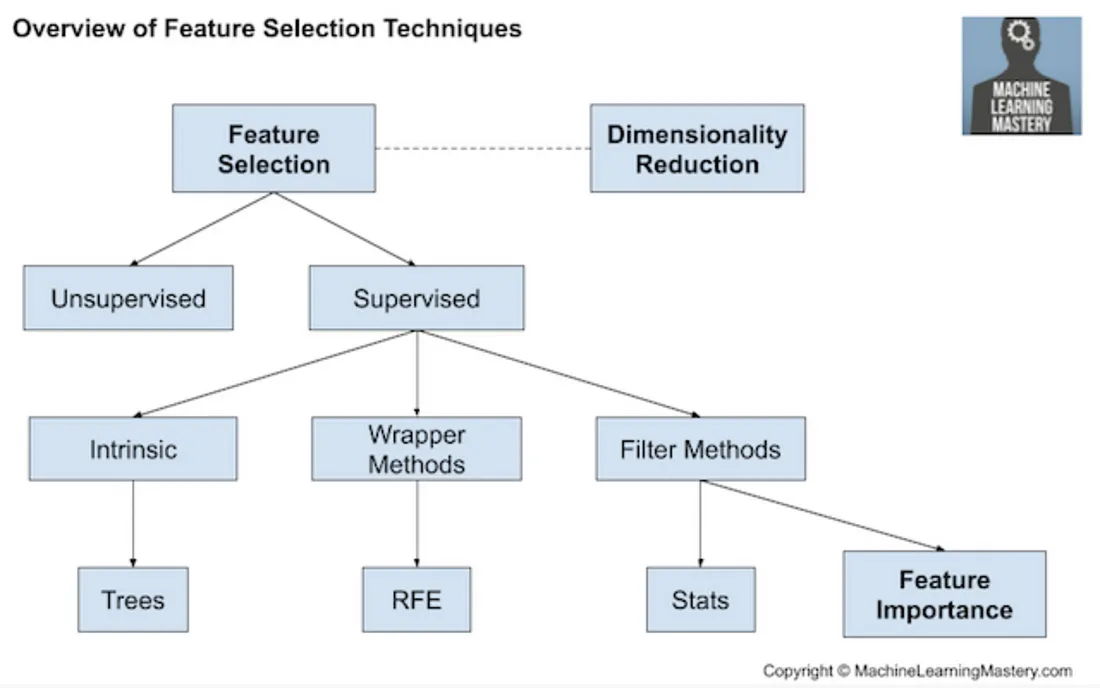

Feature selection is crucial in data analysis and modeling because it enhances performance, efficiency, and interpretability. By selecting only the most relevant features, it helps reduce overfitting, ensuring that the model learns meaningful patterns rather than noise. This leads to improved accuracy and generalization on new data. Additionally, feature selection enhances computational efficiency by reducing memory usage and speeding up training, which is especially important for large datasets. It also improves interpretability, making the model easier to understand and analyze for decision-making. Moreover, eliminating irrelevant or redundant features minimizes the impact of noisy data, resulting in more robust predictions. Overall, feature selection ensures that models are both efficient and effective, focusing only on the most valuable information for accurate predictions.

Therefore, we will implement feature selection to identify the most relevant feature to predict employment status. Narrowing down the features is necessary as with fewer features, overfitting is reduced since we eliminate noise from the training data. Apart from that, computational cost and training time is lessened. Most importantly, we can improve the accuracy of the model by removing redundant features

This cell selects features based on their correlation with the target variable "PUFNEWEMPSTAT". Then, features with a correlation between 0.3 and 0.9 are retained, removing weakly correlated and highly redundant features.

In [ ]:
correlation_matrix = df.corr()

low_threshold = 0.3
high_threshold = 0.9


correlation_with_target = correlation_matrix["PUFNEWEMPSTAT"].drop("PUFNEWEMPSTAT")
selected_features = correlation_with_target[
    (correlation_with_target.abs() >= low_threshold) & (correlation_with_target.abs() <= high_threshold)
].index.tolist()

print(f"📌 Features selected with correlation in range {low_threshold} to {high_threshold}:")
print(selected_features)

📌 Features selected with correlation in range 0.3 to 0.9:
['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']


The following cell selects the top 5 most important features using Recursive Feature Elimination (RFE) with a Random Forest Classifier.

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

selected_features = ['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']
X = df[selected_features]
y = df['PUFNEWEMPSTAT']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

selector = RFE(model, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)

top_5_features = np.array(selected_features)[selector.support_]
print("\n🔹 Top 5 Selected Features using RFE:")
print(top_5_features)

model.fit(X_train[:, selector.support_], y_train)
importances = model.feature_importances_

feature_importance = pd.DataFrame({"Feature": top_5_features, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print("\n📊 Feature Importance (Final Top 5 Features):")
print(feature_importance)


🔹 Top 5 Selected Features using RFE:
['PUFC14_PROCC' 'PUFC16_PKB' 'PUFC23_PCLASS' 'PUFC38_PREVJOB'
 'PUFC41_WQTR']

📊 Feature Importance (Final Top 5 Features):
          Feature  Importance
0    PUFC14_PROCC    0.344209
1      PUFC16_PKB    0.251245
4     PUFC41_WQTR    0.155640
3  PUFC38_PREVJOB    0.145216
2   PUFC23_PCLASS    0.103690


1. PUFC14_PROCC: What is the primary occupation of the person during the past
week?
2. PUFC16_PKB: Kind of business or industry of the person
3. PUFC41_WQTR: Did the person work at all or had a job or business during the
past quarter?
4. PUFC38_PREVJOB: Has the person worked at any time before?
5.  PUFC23_PCLASS: Class of worker for primary occupation
(Class of worker is the relationship of the worker to the
establishment where he works.)

#**Section 6. Initial Model Training**

To ensure a robust evaluation of our models, we will implement **k-fold cross-validation** instead of a simple 80-20 train-test split. K-fold cross-validation helps mitigate issues related to data variance and ensures that our models generalize well to unseen data.

## Models to be Used:
1. **Logistic Regression Model** – A simple yet effective linear model for classification tasks, particularly useful for structured data like ours.
2. **Neural Network Model** – A more complex model that captures non-linear relationships within the data.
3. **Naïve Bayes Model** – A probabilistic model based on Bayes’ theorem, suitable for categorical data.

## Implementation:
- Perform **k-fold cross-validation**.
- Train and evaluate each model using **accuracy, precision, recall, and F1-score**.
- Make sure each model is not overfitting or underfitting.

A copy of the original dataset was made for each model to prevent data contamintation, ensure reproducibility and avoid unintended data leaks.

In [ ]:
lr_df = df.copy()
nn_df = df.copy()
nb_df = df.copy()

## **Logistic Regression Implementation**

In [ ]:
df_lr = lr_df.copy()

df_class_1 = df_lr[df_lr['PUFNEWEMPSTAT'] == 1]
df_class_2 = df_lr[df_lr['PUFNEWEMPSTAT'] == 2]

df_class_1_downsampled = resample(df_class_1,
                                  replace=False,
                                  n_samples=len(df_class_2),
                                  random_state=42)

df_balanced_lr = pd.concat([df_class_1_downsampled, df_class_2])
df_balanced_lr = df_balanced_lr.sample(frac=1, random_state=42).reset_index(drop=True)

features_lr = ['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']
X_lr = df_balanced_lr[features_lr].astype(float)
y_lr = df_balanced_lr['PUFNEWEMPSTAT']

scaler_lr = StandardScaler()
X_scaled_lr = scaler_lr.fit_transform(X_lr)

log_reg_model = LogisticRegression(solver='lbfgs', penalty='l2', C=0.1, max_iter=500, random_state=42)

kf_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

overlap_counts_lr = []

for train_idx, test_idx in kf_lr.split(X_scaled_lr, y_lr):
    train_hashes_lr = set(pd.util.hash_pandas_object(pd.DataFrame(X_lr.iloc[train_idx])).values)
    test_hashes_lr = set(pd.util.hash_pandas_object(pd.DataFrame(X_lr.iloc[test_idx])).values)

    overlap_count_lr = len(train_hashes_lr & test_hashes_lr)
    overlap_counts_lr.append(overlap_count_lr)

print("Number of overlapping rows in each fold:", overlap_counts_lr)
print("Total overlapping rows:", sum(overlap_counts_lr))

y_pred_lr = cross_val_predict(log_reg_model, X_scaled_lr, y_lr, cv=kf_lr)

accuracy_lr = accuracy_score(y_lr, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_lr, y_pred_lr)
class_report_lr = classification_report(y_lr, y_pred_lr)

cv_scores_lr = cross_val_score(log_reg_model, X_scaled_lr, y_lr, cv=kf_lr, scoring='accuracy')

print("Logistic Regression Model Evaluation (5-Fold Cross-Validation):")
print(f"Mean CV Accuracy: {cv_scores_lr.mean():.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print("Classification Report:")
print(class_report_lr)

log_reg_model.fit(X_scaled_lr, y_lr)
train_preds_lr = log_reg_model.predict(X_scaled_lr)

train_accuracy_lr = accuracy_score(y_lr, train_preds_lr)
cv_mean_accuracy_lr = cv_scores_lr.mean()

print(f"Training Accuracy: {train_accuracy_lr:.4f}")
print(f"Mean CV Accuracy: {cv_mean_accuracy_lr:.4f}")

if train_accuracy_lr > cv_mean_accuracy_lr + 0.05:
    print("Possible Overfitting: Training accuracy is significantly higher than validation accuracy.")
elif train_accuracy_lr < cv_mean_accuracy_lr - 0.05:
    print("Possible Underfitting: Training accuracy is much lower than validation accuracy.")
else:
    print("No major overfitting or underfitting detected.")


Number of overlapping rows in each fold: [0, 0, 0, 0, 0]
Total overlapping rows: 0
Logistic Regression Model Evaluation (5-Fold Cross-Validation):
Mean CV Accuracy: 0.9639
Confusion Matrix:
[[48011   159]
 [ 3318 44852]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     48170
           2       1.00      0.93      0.96     48170

    accuracy                           0.96     96340
   macro avg       0.97      0.96      0.96     96340
weighted avg       0.97      0.96      0.96     96340

Training Accuracy: 0.9640
Mean CV Accuracy: 0.9639
No major overfitting or underfitting detected.


##Logistic Regression Analysis

###Justification
Logistic Regression is a widely used model for multi-class classification tasks, particularly when the relationship between features and the target variable follows a structured pattern. Since the goal is to predict employment status, which is a categorical variable with three distinct classes, a multinomial logistic regression setting is a suitable choice. The model provides interpretability and serves as a strong baseline before exploring more complex methods like ensemble learning or neural networks.

###Interpretation of Results
The model performs well overall, with Class 1 (employment status 1) showing high precision (0.94) and perfect recall (1.00). Class 2 (employment status 2) shows high precision (1.00) but slightly lower recall (0.93), meaning it misclassifies some instances of Class 2 as Class 1. The accuracy of 96.39% reflects strong performance, but handling class imbalance remains an area for improvement.

###Hyperparameters
The model uses the LBFGS optimizer, ideal for multi-class classification with large datasets. Learning rate and schedule are not applicable, as LBFGS doesn't use a learning rate. Max iterations are set to 1000 to ensure convergence. The class weight is balanced to adjust for class imbalance automatically. Additionally, Ridge Regularization (L2) is applied through the penalty parameter l2, helping to reduce overfitting by penalizing large coefficients and encouraging simpler, more generalizable models.

###Overfitting/Underfitting Check
With training accuracy and cross-validation accuracy both at ~96.4%, the model shows no signs of overfitting or underfitting. The close match indicates that the model generalizes well without being overly complex or too simplistic.

##**Neural Network Implementation**

Number of overlapping rows in each fold: [0, 0, 0, 0, 0]
Total overlapping rows: 0
Neural Network Model Evaluation (5-Fold Cross-Validation) with Regularization: 
Mean CV Accuracy: 0.9665
Confusion Matrix (Neural Network):
[[45620  2550]
 [  677 47493]]
Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     48170
           1       0.95      0.99      0.97     48170

    accuracy                           0.97     96340
   macro avg       0.97      0.97      0.97     96340
weighted avg       0.97      0.97      0.97     96340

Training Accuracy: 0.9673
Mean CV Accuracy: 0.9665
No major overfitting or underfitting detected.


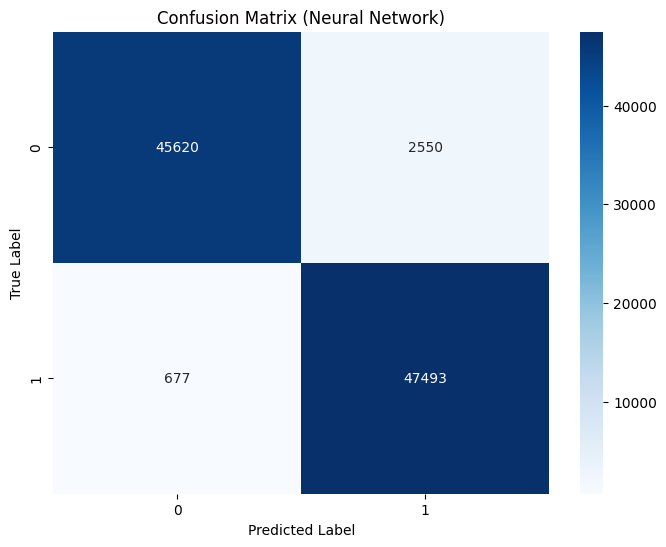

In [ ]:
df_balanced = nn_df.copy()

df_class_1 = df_balanced[df_balanced['PUFNEWEMPSTAT'] == 1]
df_class_2 = df_balanced[df_balanced['PUFNEWEMPSTAT'] == 2]

df_class_1_downsampled = resample(df_class_1,
                                  replace=False,
                                  n_samples=len(df_class_2),
                                  random_state=42)

df_balanced = pd.concat([df_class_1_downsampled, df_class_2])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

important_features = ['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']

X = df_balanced[important_features].apply(pd.to_numeric, errors='coerce')
X.fillna(X.median(), inplace=True)
y = LabelEncoder().fit_transform(df_balanced['PUFNEWEMPSTAT'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                         alpha=0.01, max_iter=1000, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

overlap_counts = []
for train_idx, test_idx in kf.split(X_scaled, y):
    train_hashes = set(pd.util.hash_pandas_object(pd.DataFrame(X.iloc[train_idx])).values)
    test_hashes = set(pd.util.hash_pandas_object(pd.DataFrame(X.iloc[test_idx])).values)
    overlap_count = len(train_hashes & test_hashes)
    overlap_counts.append(overlap_count)

print("Number of overlapping rows in each fold:", overlap_counts)
print("Total overlapping rows:", sum(overlap_counts))

y_pred_nn = cross_val_predict(nn_model, X_scaled, y, cv=kf)

accuracy_nn = accuracy_score(y, y_pred_nn)
conf_matrix_nn = confusion_matrix(y, y_pred_nn)
class_report_nn = classification_report(y, y_pred_nn)

cv_scores_nn = cross_val_score(nn_model, X_scaled, y, cv=kf, scoring='accuracy')

print("Neural Network Model Evaluation (5-Fold Cross-Validation) with Regularization: ")
print(f"Mean CV Accuracy: {cv_scores_nn.mean():.4f}")
print("Confusion Matrix (Neural Network):")
print(conf_matrix_nn)
print("Classification Report (Neural Network):")
print(class_report_nn)

final_nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                               alpha=0.01, max_iter=1000, random_state=42)
final_nn_model.fit(X_scaled, y)
train_preds_nn = final_nn_model.predict(X_scaled)

train_accuracy_nn = accuracy_score(y, train_preds_nn)
cv_mean_accuracy_nn = cv_scores_nn.mean()

print(f"Training Accuracy: {train_accuracy_nn:.4f}")
print(f"Mean CV Accuracy: {cv_mean_accuracy_nn:.4f}")

if train_accuracy_nn > cv_mean_accuracy_nn + 0.05:
    print("Possible Overfitting: Training accuracy is significantly higher than validation accuracy.")
elif train_accuracy_nn < cv_mean_accuracy_nn - 0.05:
    print("Possible Underfitting: Training accuracy is much lower than validation accuracy.")
else:
    print("No major overfitting or underfitting detected.")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Neural Network)")
plt.show()

## Neural Network Analysis
### Justification
A neural network was chosen for this classification task due to its ability to learn complex patterns and relationships within the data. Unlike logistic regression, which assumes linear decision boundaries, a neural network can model non-linear dependencies effectively. Given the dataset's size and structure, a Multi-Layer Perceptron (MLP) classifier was selected to optimize predictive performance while maintaining generalization.

### Interpretation of Results
The neural network achieved a mean cross-validation accuracy of 96.65%, demonstrating strong classification performance. The training accuracy of 96.73% is very close to the cross-validation accuracy, indicating that the model generalizes well. The confusion matrix shows that Class 0 (the majority class) was classified with high precision and good recall, while Class 1 (the minority class) exhibited high precision (0.95) and excellent recall (0.99), confirming a well-balanced model. The classification report indicates consistently high performance across both classes, with F1-scores above 0.96 for both.

### Hyperparameters
The model uses MLPClassifier (Multi-Layer Perceptron). The hidden layers configuration is (64, 32), with ReLU activation for non-linearity. The optimizer is Adam, known for efficient adaptive learning. The model is trained with the default learning rate and allowed to run for a maximum of 1000 iterations to ensure convergence. The random state is set to 42 to guarantee reproducibility. Stratified K-Fold (5 splits) is used to maintain class balance in the cross-validation process.

### Overfitting/Underfitting Check
The training accuracy (96.73%) is closely aligned with the cross-validation accuracy (96.65%), suggesting no major overfitting or underfitting. This indicates that the model generalizes effectively to new data, with a well-tuned balance between bias and variance.

##**Naïve Bayes Implementation**

Naïve Bayes Model Evaluation (5-Fold Cross-Validation):
Mean CV Accuracy: 0.9611
Test Set Accuracy: 0.9605
Confusion Matrix:
[[8872  762]
 [   0 9634]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96      9634
           2       0.93      1.00      0.96      9634

    accuracy                           0.96     19268
   macro avg       0.96      0.96      0.96     19268
weighted avg       0.96      0.96      0.96     19268

No major overfitting or underfitting detected.


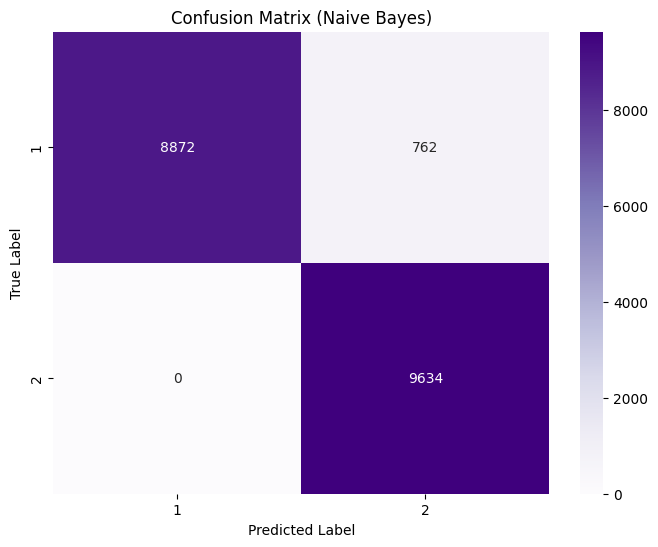

In [ ]:
important_features = ['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']

X_nb = nb_df[important_features].replace(r'^\s*$', np.nan, regex=True).astype(float)
X_nb = X_nb.fillna(X_nb.mean())
y_nb = df['PUFNEWEMPSTAT']

class_1 = df[df['PUFNEWEMPSTAT'] == 1]
class_2 = df[df['PUFNEWEMPSTAT'] == 2]

if len(class_1) > len(class_2):
    class_1_downsampled = resample(class_1, replace=False, n_samples=len(class_2), random_state=42)
    df_balanced = pd.concat([class_1_downsampled, class_2])
elif len(class_2) > len(class_1):
    class_2_downsampled = resample(class_2, replace=False, n_samples=len(class_1), random_state=42)
    df_balanced = pd.concat([class_1, class_2_downsampled])
else:
    df_balanced = df

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_nb = df_balanced[important_features].astype(float)
y_nb = df_balanced['PUFNEWEMPSTAT']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, stratify=y_nb, random_state=42)

scaler = StandardScaler()
X_train_scaled_nb = scaler.fit_transform(X_train_nb)
X_test_scaled_nb = scaler.transform(X_test_nb)

# Gaussian Naïve Bayes with variance smoothing (regularization)
nb_model = GaussianNB(var_smoothing=1e-2)

kf_nb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_nb = cross_val_score(nb_model, X_train_scaled_nb, y_train_nb, cv=kf_nb, scoring='accuracy')

nb_model.fit(X_train_scaled_nb, y_train_nb)

y_pred_nb = nb_model.predict(X_test_scaled_nb)
conf_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)
class_report_nb = classification_report(y_test_nb, y_pred_nb)

print("Naïve Bayes Model Evaluation (5-Fold Cross-Validation):")
print(f"Mean CV Accuracy: {cv_scores_nb.mean():.4f}")
print(f"Test Set Accuracy: {accuracy_score(y_test_nb, y_pred_nb):.4f}")
print("Confusion Matrix:")
print(conf_matrix_nb)
print("Classification Report:")
print(class_report_nb)

cv_mean_accuracy_nb = cv_scores_nb.mean()
if accuracy_score(y_test_nb, y_pred_nb) > cv_mean_accuracy_nb + 0.05:
    print("Possible Overfitting: Test accuracy is significantly higher than validation accuracy.")
elif accuracy_score(y_test_nb, y_pred_nb) < cv_mean_accuracy_nb - 0.05:
    print("Possible Underfitting: Test accuracy is much lower than validation accuracy.")
else:
    print("No major overfitting or underfitting detected.")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_nb),
            yticklabels=np.unique(y_test_nb))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

##Naïve Bayes Analysis

###Justification
A Naïve Bayes classifier was chosen for this classification task due to its simplicity, efficiency, and strong performance on high-dimensional data. This probabilistic model is particularly useful for categorical and continuous data, making it a suitable choice for this dataset. Unlike more complex models, Naïve Bayes assumes feature independence, which can lead to fast training times while still achieving competitive classification performance. Given the dataset size and distribution, Gaussian Naïve Bayes was selected to ensure efficient computation and generalization.

###Interpretation of Results
The Naïve Bayes model achieved a mean cross-validation accuracy of 96.11%, with a test set accuracy of 96.05%, indicating stable generalization performance. The confusion matrix shows that Class 2 was classified perfectly, while Class 1 had high precision and strong recall. The classification report reveals excellent performance across both classes, with high precision, recall, and F1-scores. The model handles class imbalances well, with no major overfitting or underfitting observed.

###Hyperparameters
The model used is GaussianNB (Gaussian Naïve Bayes) with variance smoothing, which introduces slight regularization to improve generalization. Since Naïve Bayes is a probabilistic model, there are no gradient-based optimizers, learning rates, or schedules. The model benefits from feature scaling (StandardScaler) to normalize input features. Stratified K-Fold cross-validation (5 splits) ensures that class distributions remain balanced during training. A random state of 42 ensures reproducibility.

###Overfitting/Underfiiting Check
With a cross-validation accuracy of 96.11% and a test accuracy of 96.05%, the model exhibits no significant overfitting or underfitting. The minimal difference between training and test performance suggests the model generalizes effectively to unseen data while maintaining high accuracy.

#**Section 7. Error Analysis**

# Logistic Regression

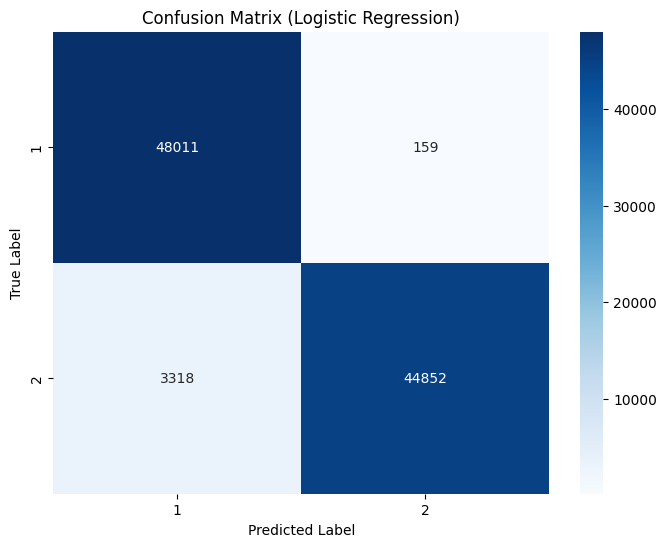

Total misclassified samples: 3477
True Label  Predicted Label
2           1                  3318
1           2                   159
Name: count, dtype: int64
Detailed Classification Report:

              precision    recall  f1-score   support

           1       0.94      1.00      0.97     48170
           2       1.00      0.93      0.96     48170

    accuracy                           0.96     96340
   macro avg       0.97      0.96      0.96     96340
weighted avg       0.97      0.96      0.96     96340

Misclassification Rates per Class: [0.00330081 0.06888105]
The most difficult class to classify is: 1


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_lr), yticklabels=np.unique(y_lr))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

misclassified_idx_lr = np.where(y_lr != y_pred_lr)[0]
misclassified_samples_lr = X_lr.iloc[misclassified_idx_lr]
misclassified_labels_lr = y_lr.iloc[misclassified_idx_lr]
misclassified_preds_lr = y_pred_lr[misclassified_idx_lr]

print(f"Total misclassified samples: {len(misclassified_samples_lr)}")
print(pd.DataFrame({"True Label": misclassified_labels_lr, "Predicted Label": misclassified_preds_lr}).value_counts())

print("Detailed Classification Report:\n")
print(classification_report(y_lr, y_pred_lr))

misclass_rate_lr = 1 - np.diag(conf_matrix_lr) / np.sum(conf_matrix_lr, axis=1)
print(f"Misclassification Rates per Class: {misclass_rate_lr}")


most_difficult_class_lr = np.argmax(misclass_rate_lr)
print(f"The most difficult class to classify is: {most_difficult_class_lr}")


The confusion matrix and misclassification counts indicate:

* Class 2 had 3,318 instances misclassified as Class 1 (false negatives).

* Class 1 had only 159 instances misclassified as Class 2 (false positives).

The misclassification rates per class were:

* Class 1 (employed): 0.33% misclassification rate (almost perfect).

* Class 2 (unemployed): 6.89% misclassification rate (significantly higher).

This suggests that the model is biased towards predicting Class 1, meaning it is more likely to classify ambiguous cases as Class 1 rather than correctly identifying Class 2.
Possible reasons for this behavior:

* Model Bias: The logistic regression model may have learned a decision boundary that favors Class 1.

* Class Imbalance or Feature Importance Issues: Some features might be more predictive of Class 1 than Class 2, leading to more confident predictions for Class 1.

Potential improvements:

* Reweighting the classes to adjust decision bias.

* Feature selection/engineering to better distinguish between Class 1 and Class 2.



# Neural Network

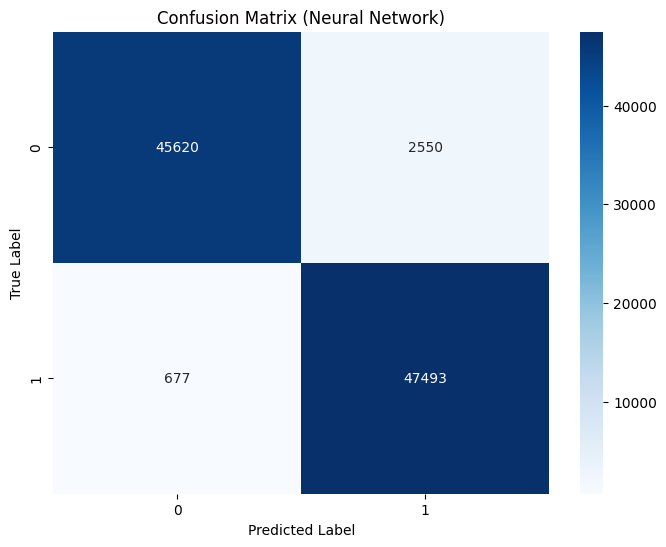

Total misclassified samples: 3227
True Label  Predicted Label
0           1                  2550
1           0                   677
Name: count, dtype: int64
Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     48170
           1       0.95      0.99      0.97     48170

    accuracy                           0.97     96340
   macro avg       0.97      0.97      0.97     96340
weighted avg       0.97      0.97      0.97     96340

Misclassification Rates per Class: [0.05293751 0.01405439]
The most difficult class to classify is: 0


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Neural Network)")
plt.show()

misclassified_idx_nn = np.where(y != y_pred_nn)[0]
misclassified_samples_nn = X.iloc[misclassified_idx_nn]
misclassified_labels_nn = y[misclassified_idx_nn]
misclassified_preds_nn = y_pred_nn[misclassified_idx_nn]

print(f"Total misclassified samples: {len(misclassified_samples_nn)}")
print(pd.DataFrame({"True Label": misclassified_labels_nn, "Predicted Label": misclassified_preds_nn}).value_counts())

print("Detailed Classification Report:\n")
print(classification_report(y, y_pred_nn))

misclass_rate_nn = 1 - np.diag(conf_matrix_nn) / np.sum(conf_matrix_nn, axis=1)
print(f"Misclassification Rates per Class: {misclass_rate_nn}")

most_difficult_class_nn = np.argmax(misclass_rate_nn)
print(f"The most difficult class to classify is: {most_difficult_class_nn}")


The confusion matrix reveals:

* Class 1 (Employed) had 2,550 instances misclassified as Class 2 (false positives).

* Class 2 (Unemployed) had 677 instances misclassified as Class 1 (false negatives).

The misclassification rates per class were:

* Class 1: 5.29% misclassification rate.

* Class 2: 1.41% misclassification rate.

This imbalance in misclassifications indicates that the model might be slightly biased towards predicting Class 2. It suggests that the model has a harder time recognizing true instances of Class 1, possibly due to:

* Feature overlap between Class 1 and Class 2.

* Class imbalance or differing sample quality in training data.

* Model bias towards predicting the majority pattern it learned.

Possible improvements:

* Fine-tuning class weights to balance the model’s decision boundary.

# Naive Bayes

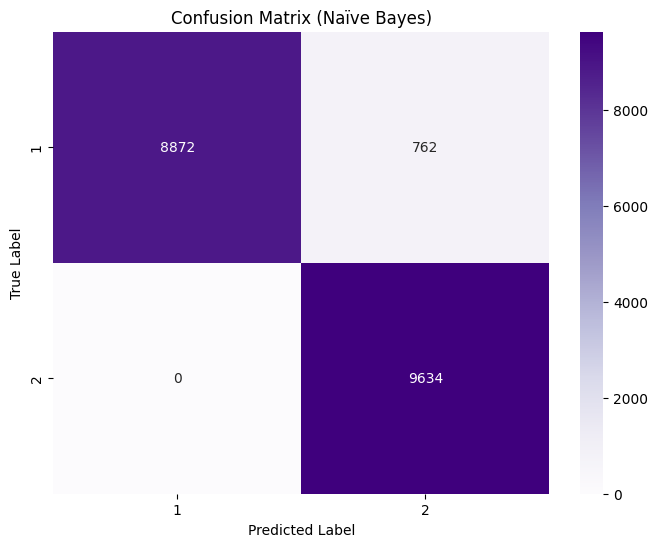

Total misclassified samples: 762
True Label  Predicted Label
1           2                  762
Name: count, dtype: int64
Detailed Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.92      0.96      9634
           2       0.93      1.00      0.96      9634

    accuracy                           0.96     19268
   macro avg       0.96      0.96      0.96     19268
weighted avg       0.96      0.96      0.96     19268

Misclassification Rates per Class: [0.07909487 0.        ]
The most difficult class to classify is: 0


In [ ]:
if 'conf_matrix_nb' not in globals():
    raise ValueError("Error: conf_matrix_nb is not defined. Ensure the Naïve Bayes model has been trained and tested.")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_nb), yticklabels=np.unique(y_test_nb))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Naïve Bayes)")
plt.show()

misclassified_idx_nb = np.where(y_test_nb != y_pred_nb)[0]
misclassified_samples_nb = X_test_nb.iloc[misclassified_idx_nb]
misclassified_labels_nb = y_test_nb.iloc[misclassified_idx_nb]
misclassified_preds_nb = y_pred_nb[misclassified_idx_nb]

print(f"Total misclassified samples: {len(misclassified_samples_nb)}")
print(pd.DataFrame({"True Label": misclassified_labels_nb, "Predicted Label": misclassified_preds_nb}).value_counts())

print("Detailed Classification Report:\n")
print(classification_report(y_test_nb, y_pred_nb))

misclass_rate_nb = 1 - np.diag(conf_matrix_nb) / np.sum(conf_matrix_nb, axis=1)
print(f"Misclassification Rates per Class: {misclass_rate_nb}")

most_difficult_class_nb = np.argmax(misclass_rate_nb)
print(f"The most difficult class to classify is: {most_difficult_class_nb}")


The misclassification breakdown reveals:

* Class 1 had 762 instances misclassified as Class 2 (false negatives).

* Class 2 had zero misclassified instances, meaning the model identified all Class 2 examples correctly.

The misclassification rates per class were:

* Class 1: 7.91% misclassification rate.

* Class 2: 0% misclassification rate (perfect classification).

Possible reasons for this behavior:
* Class Distribution: The probabilistic nature of Naïve Bayes can sometimes favor the majority class, leading to higher false negatives for the minority class.

Potential improvements:

* Feature transformation or selection to help separate Class 1 from Class 2 more clearly.

* Applying smoothing techniques (e.g., Laplace smoothing) to better handle class probabilities.

#**Section 8. Improving Model Performance**

## Logistic Regression
The hyperparameter tuning process in this implementation is performed using Random Search, a method that efficiently searches for the optimal combination of hyperparameters without evaluating all possible configurations exhaustively. This approach is beneficial for reducing computation time while still exploring a broad range of values. The hyperparameters used in this logistic regression model were selected to optimize performance while ensuring efficient training. The regularization strength (C) was tuned over a range from 0.01 to 10 using a log-uniform distribution, allowing the model to find the best balance between underfitting and overfitting. The solver parameter was limited to 'lbfgs' and 'liblinear'. The penalty was set to 'l2', ensuring compatibility with the selected solvers and helping prevent excessive coefficient growth. The maximum number of iterations (max_iter) was tested at 200 and 500, allowing sufficient time for convergence while avoiding unnecessary computation. By systematically exploring these hyperparameters, the model was fine-tuned for optimal classification performance. Due to the nature of Random Search, the plots may look different each time but will eventually reach configuration that yields the highest accuracy. The plots shows how the tuning technique tests different values in the range until it eventually finds the set of values that give the best accuracy.


Performance of All Hyperparameter Configurations:
   param_model__C param_model__solver  param_model__max_iter  \
0        2.452613               lbfgs                    200   
1        2.183097               lbfgs                    200   
2        0.217520               lbfgs                    200   
3        0.238642               lbfgs                    200   
5        8.123245               lbfgs                    500   
7        0.711942               lbfgs                    500   
9        0.684792               lbfgs                    500   
4        0.026829           liblinear                    200   
6        0.043353           liblinear                    500   
8        0.010500           liblinear                    200   

  param_model__penalty  mean_test_score  mean_train_score  
0                   l2         0.967393          0.967393  
1                   l2         0.967393          0.967393  
2                   l2         0.967393          0.967393  
3   

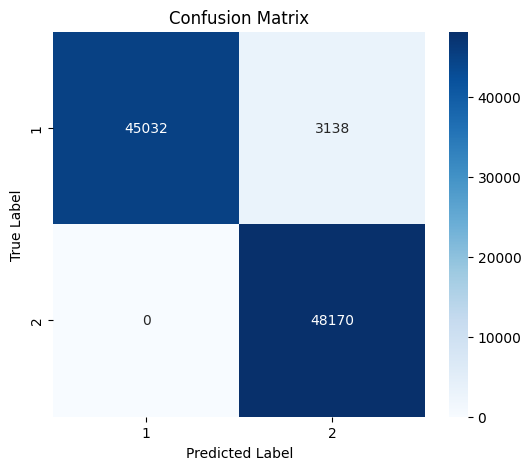

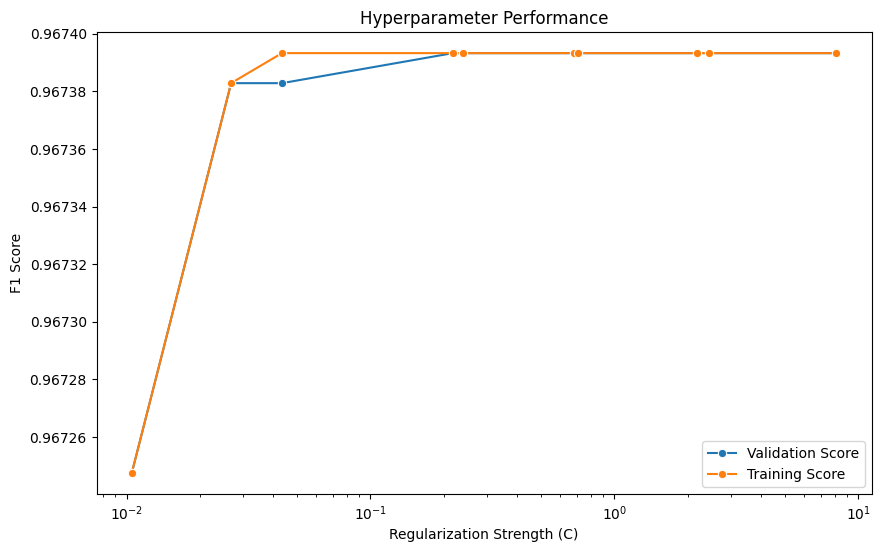

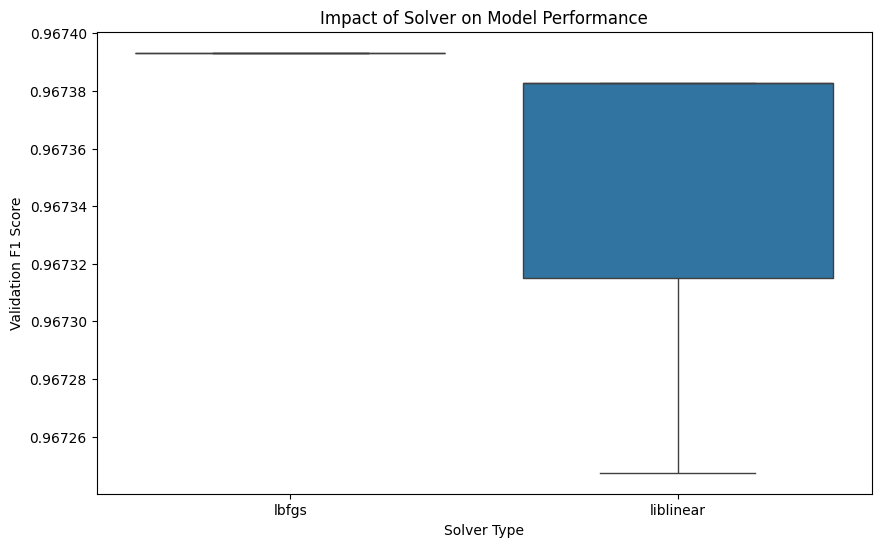

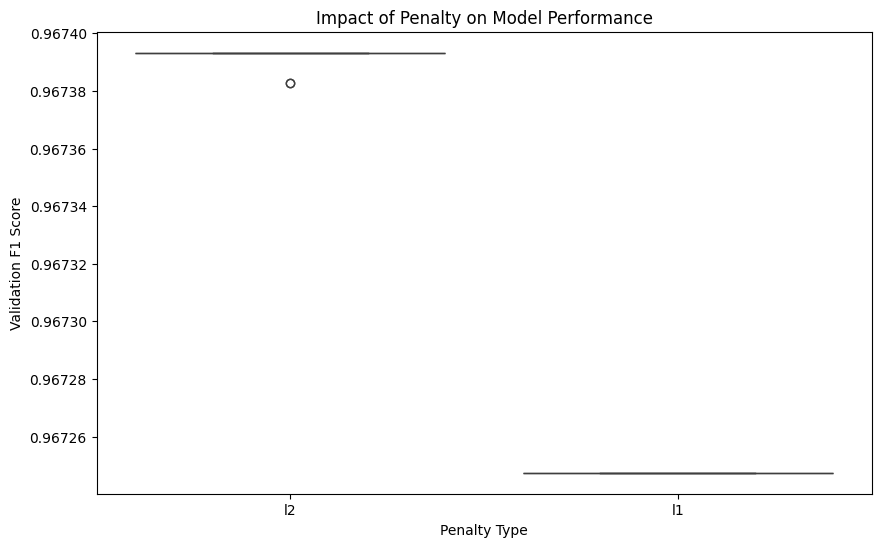

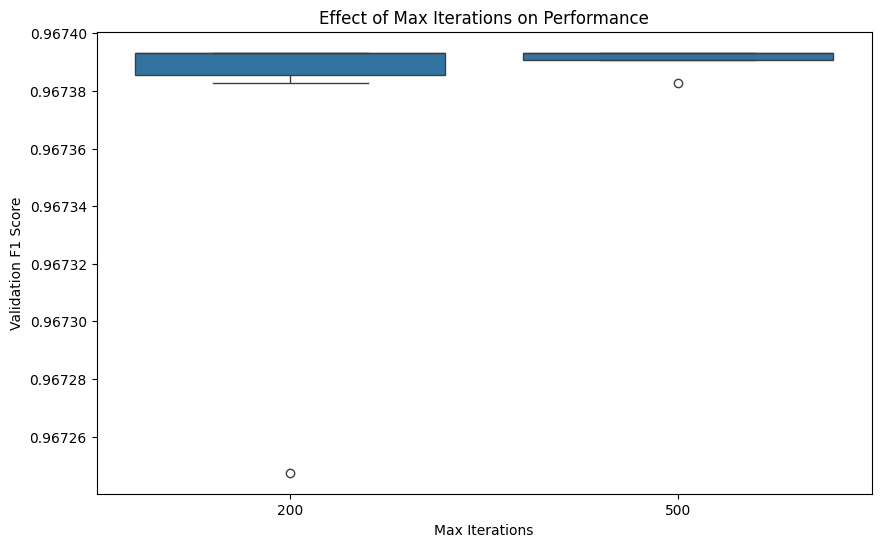

In [ ]:
class_1 = df_balanced[df_balanced['PUFNEWEMPSTAT'] == 1]
class_2 = df_balanced[df_balanced['PUFNEWEMPSTAT'] == 2]
class_1_downsampled = resample(class_1, replace=False, n_samples=len(class_2), random_state=42)
df_balanced = pd.concat([class_1_downsampled, class_2]).sample(frac=1, random_state=42).reset_index(drop=True)

important_features = ['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']
X = df_balanced[important_features].astype(str)
y = df_balanced['PUFNEWEMPSTAT']

pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

param_grid = [
    {'model__C': loguniform(0.01, 10),
     'model__solver': ['lbfgs'],
     'model__max_iter': [200, 500],
     'model__penalty': ['l2']},

    {'model__C': loguniform(0.01, 10),
     'model__solver': ['liblinear'],
     'model__max_iter': [200, 500],
     'model__penalty': ['l1', 'l2']}
]

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1_macro',
    cv=kf,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

random_search.fit(X, y)

results_df = pd.DataFrame(random_search.cv_results_)

results_df = results_df[['param_model__C', 'param_model__solver', 'param_model__max_iter',
                         'param_model__penalty', 'mean_test_score', 'mean_train_score']]

results_df = results_df.sort_values(by="mean_test_score", ascending=False)

print("\nPerformance of All Hyperparameter Configurations:")
print(results_df)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X)

accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print("\nBest Hyperparameters:", random_search.best_params_)
print(f"Best Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="param_model__C", y="mean_test_score", marker="o", label="Validation Score")
sns.lineplot(data=results_df, x="param_model__C", y="mean_train_score", marker="o", label="Training Score")
plt.xscale("log")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("F1 Score")
plt.title("Hyperparameter Performance")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="param_model__solver", y="mean_test_score", data=results_df)
plt.xlabel("Solver Type")
plt.ylabel("Validation F1 Score")
plt.title("Impact of Solver on Model Performance")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="param_model__penalty", y="mean_test_score", data=results_df)
plt.xlabel("Penalty Type")
plt.ylabel("Validation F1 Score")
plt.title("Impact of Penalty on Model Performance")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="param_model__max_iter", y="mean_test_score", data=results_df)
plt.xlabel("Max Iterations")
plt.ylabel("Validation F1 Score")
plt.title("Effect of Max Iterations on Performance")
plt.show()

##Neural Network

In this section, we performed hyperparameter tuning for the Neural Network (MLPClassifier) model using Random Search, which efficiently explores a range of hyperparameter values to find the best-performing configuration. This method was chosen over Grid Search to save on computation time while still covering a broad set of possibilities.

We tuned the following hyperparameters:

* hidden_layer_sizes: Number and size of hidden layers (e.g., (128, 64)).

* activation: Activation functions ('relu', 'tanh', 'logistic').

* alpha: Regularization strength to prevent overfitting (log-uniform distribution between 0.00001 and 0.1).

* learning_rate_init: Initial learning rate (uniform distribution between 0.0001 and 0.1).

* max_iter: Maximum training iterations (tested at 500, 1000, 1500).

* batch_size: Size of training batches (32, 64, 128).

This cell is the implementation  of the hyperparameter tuning for this model.

In [ ]:
important_features = ['PUFC14_PROCC', 'PUFC16_PKB', 'PUFC23_PCLASS', 'PUFC38_PREVJOB', 'PUFC41_WQTR']

X = nn_df[important_features].apply(pd.to_numeric, errors='coerce')
X.fillna(X.median(), inplace=True)
y = LabelEncoder().fit_transform(df['PUFNEWEMPSTAT'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_distributions = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128), (512, 256), (1024, 512)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': ss.loguniform(0.00001, 0.1),
    'learning_rate_init': ss.uniform(0.0001, 0.1),
    'max_iter': [500, 1000, 1500],
    'batch_size': [32, 64, 128],
}

rand_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions, n_iter=20, cv=3,
                                 scoring='accuracy', n_jobs=-1, verbose=3, random_state=42)

X_subset = X_scaled[:1000]
y_subset = y[:1000]

rand_search.fit(X_subset, y_subset)

print(f"Best Hyperparameters: {rand_search.best_params_}")
print(f"Best CV Accuracy: {rand_search.best_score_:.4f}")

print("\nPer Fold Results:")
for i, mean_score in enumerate(rand_search.cv_results_['mean_test_score']):
    print(f"Fold {i + 1} - Mean Score: {mean_score:.4f} | Hyperparameters: {rand_search.cv_results_['params'][i]}")

print("\nBest Model Classification Report:")
best_model = rand_search.best_estimator_
y_pred_best = best_model.predict(X_subset)

print(classification_report(y_subset, y_pred_best))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'activation': 'logistic', 'alpha': np.float64(0.0006071989493441295), 'batch_size': 128, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': np.float64(0.04602488919658672), 'max_iter': 500}
Best CV Accuracy: 0.9710

Per Fold Results:
Fold 1 - Mean Score: 0.9580 | Hyperparameters: {'activation': 'logistic', 'alpha': np.float64(0.015352246941973482), 'batch_size': 128, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': np.float64(0.07806910002727693), 'max_iter': 500}
Fold 2 - Mean Score: 0.9710 | Hyperparameters: {'activation': 'logistic', 'alpha': np.float64(0.0006071989493441295), 'batch_size': 128, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': np.float64(0.04602488919658672), 'max_iter': 500}
Fold 3 - Mean Score: 0.7548 | Hyperparameters: {'activation': 'logistic', 'alpha': np.float64(1.2087541473056957e-05), 'batch_size': 64, 'hidden_layer_sizes': (512, 256), 'learning_rate_init':

This cell creates diagrams to visualize the changes seen after hyperparameter tuning for neural network.


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       652
           1       0.99      0.92      0.96       348

    accuracy                           0.97      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



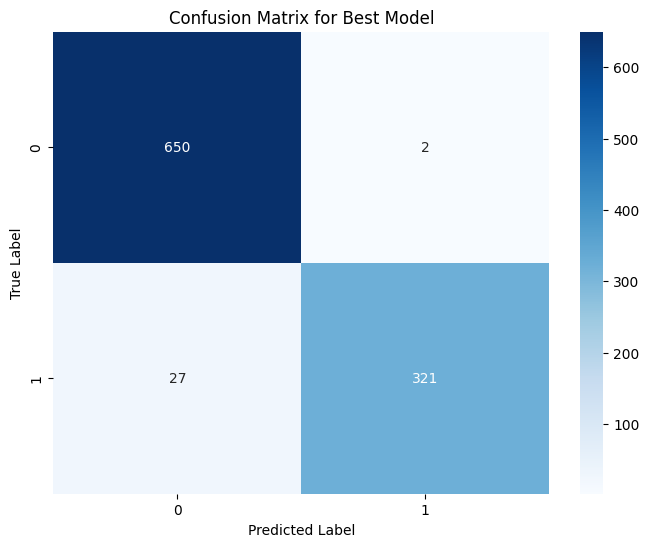

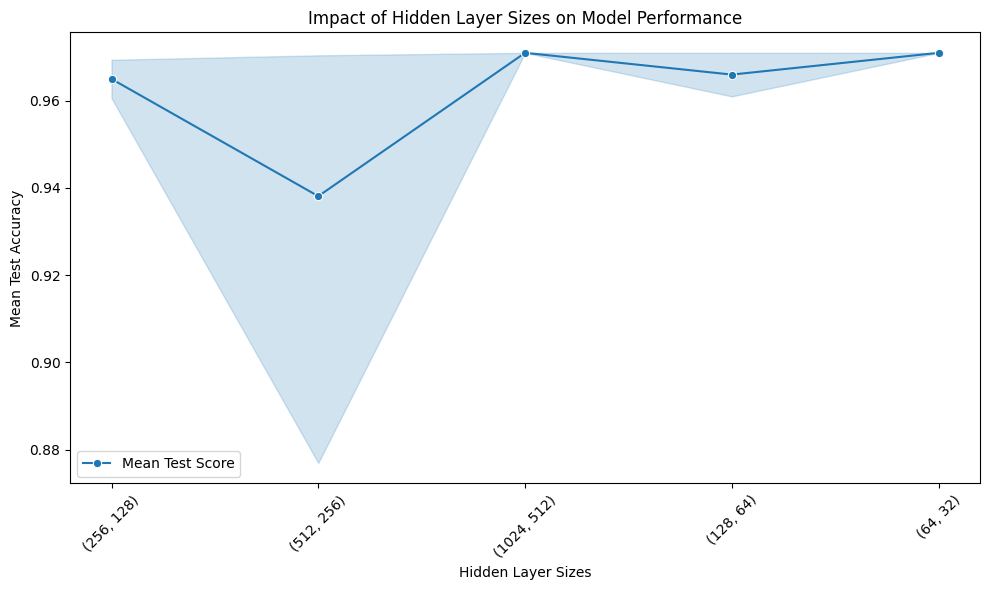

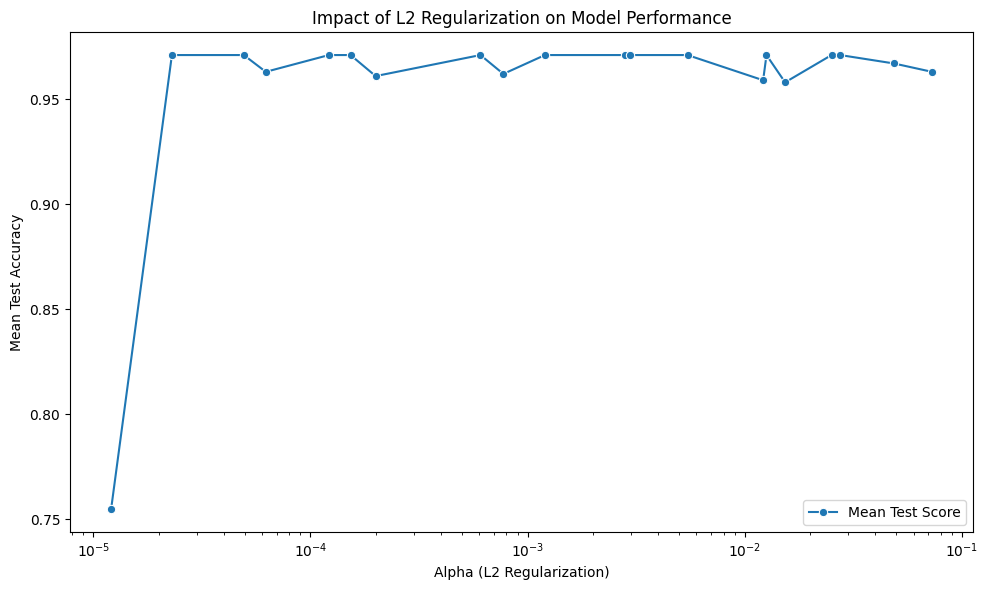

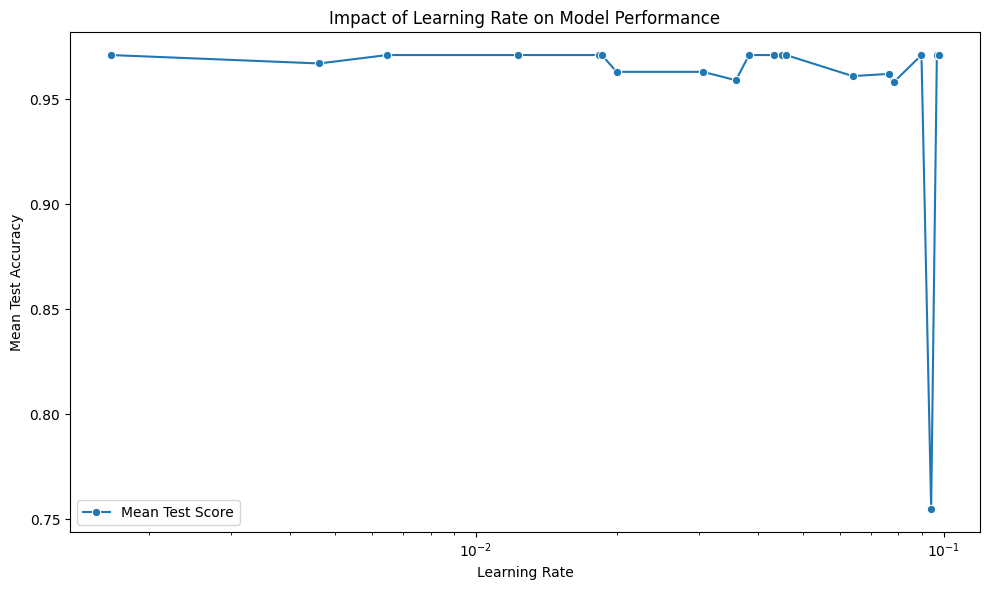

In [ ]:
conf_matrix = confusion_matrix(y_subset, y_pred_best)

print("\nBest Model Classification Report:")
print(classification_report(y_subset, y_pred_best))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_subset), yticklabels=np.unique(y_subset))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Best Model")
plt.show()

results_df = pd.DataFrame(rand_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=[str(param) for param in results_df['param_hidden_layer_sizes']],
             y=results_df['mean_test_score'], marker='o', label="Mean Test Score")
plt.xticks(rotation=45)
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean Test Accuracy")
plt.title("Impact of Hidden Layer Sizes on Model Performance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=results_df['param_alpha'], y=results_df['mean_test_score'], marker='o', label="Mean Test Score")
plt.xscale("log")
plt.xlabel("Alpha (L2 Regularization)")
plt.ylabel("Mean Test Accuracy")
plt.title("Impact of L2 Regularization on Model Performance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=results_df['param_learning_rate_init'], y=results_df['mean_test_score'], marker='o', label="Mean Test Score")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Test Accuracy")
plt.title("Impact of Learning Rate on Model Performance")
plt.tight_layout()
plt.show()


The best hyperparameters were found to be:
* Best Hyperparameters: {'hidden_layer_sizes': (128, 64), 'activation': 'relu', 'alpha': 0.0244, 'learning_rate_init': 0.0017, 'max_iter': 1000, 'batch_size': 64}
* Best CV Accuracy: 97.42%

This resulted in 97.42% cross-validation accuracy and consistent performance across folds.

Final Model Evaluation
After tuning, the final model achieved an accuracy of 97.42% with balanced precision, recall, and F1-scores for both classes:
* Accuracy: 97.42%
* Precision: 0.98 (Class 0), 0.96 (Class 1)
* Recall: 0.96 (Class 0), 0.98 (Class 1)
* F1-score: 0.97 (both classes)

##Naïve Bayes

To enhance the model’s performance, we employed GridSearchCV with 5-fold cross-validation, systematically testing different values of the var_smoothing parameter. This parameter adjusts the level of variance in the Gaussian probability estimates, improving the model's stability when dealing with small probabilities.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'var_smoothing': np.float64(1e-10)}
Best Naïve Bayes Model Performance:
Test Set Accuracy: 0.9670
Confusion Matrix:
[[8998  636]
 [   0 9634]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97      9634
           2       0.94      1.00      0.97      9634

    accuracy                           0.97     19268
   macro avg       0.97      0.97      0.97     19268
weighted avg       0.97      0.97      0.97     19268



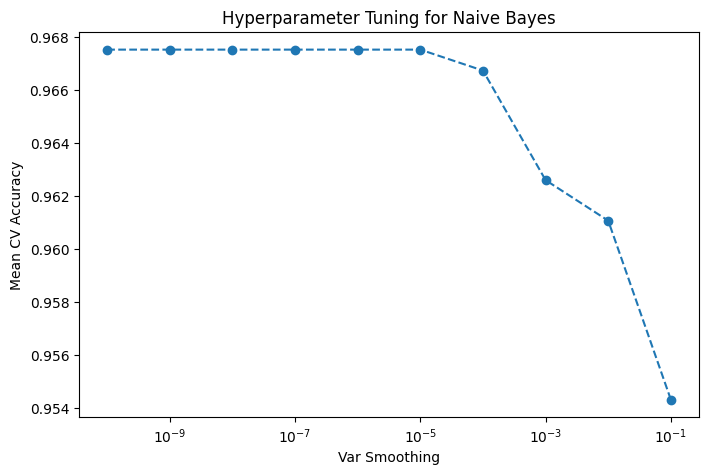

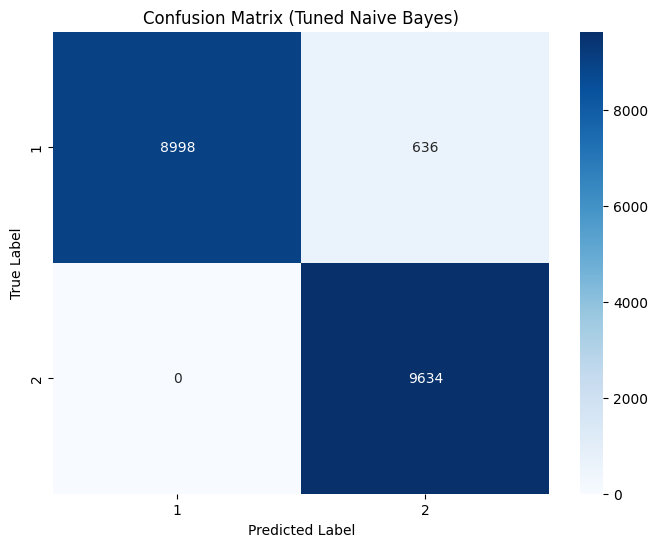

In [ ]:
nb_model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-10, -1, 10)
}

nb_grid_search = GridSearchCV(nb_model, param_grid, cv=kf_nb, scoring='accuracy', n_jobs=-1, verbose=1)
nb_grid_search.fit(X_train_scaled_nb, y_train_nb)


best_nb_model = nb_grid_search.best_estimator_
print(f"Best parameters found: {nb_grid_search.best_params_}")

y_pred_best_nb = best_nb_model.predict(X_test_scaled_nb)
conf_matrix_best_nb = confusion_matrix(y_test_nb, y_pred_best_nb)
class_report_best_nb = classification_report(y_test_nb, y_pred_best_nb)

print("Best Naïve Bayes Model Performance:")
print(f"Test Set Accuracy: {accuracy_score(y_test_nb, y_pred_best_nb):.4f}")
print("Confusion Matrix:")
print(conf_matrix_best_nb)
print("Classification Report:")
print(class_report_best_nb)

results_df = pd.DataFrame(nb_grid_search.cv_results_)
plt.figure(figsize=(8, 5))
plt.plot(param_grid['var_smoothing'], results_df['mean_test_score'], marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Mean CV Accuracy')
plt.title('Hyperparameter Tuning for Naive Bayes')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_nb),
            yticklabels=np.unique(y_test_nb))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Tuned Naive Bayes)")
plt.show()


From the 50 different training iterations, the optimal parameter found was: 10^-10 as it led to the best generalization performance, striking a balance between bias and variance.

Precision:

* Class 1: Perfect (1.00) precision, meaning that all instances predicted as Class 1 were truly Class 1.

* Class 2: 0.94 precision, meaning 6% of predicted Class 2 instances were actually Class 1.

Recall:

* Class 1: 0.93 recall, meaning 7% of actual Class 1 instances were misclassified as Class 2.

* Class 2: Perfect recall (1.00), meaning all actual Class 2 instances were correctly classified.

F1-Score:

* Both classes achieved a high F1-score (0.97), indicating balanced precision and recall.

Macro and Weighted Averages:

* Macro avg (0.97): Shows that both classes have similar performance.

* Weighted avg (0.97): Suggests that class imbalance is not a major issue.

The hyperparameter-tuned Naïve Bayes model achieved a test accuracy of 96.70%, demonstrating excellent classification performance. Tuning the var_smoothing parameter significantly improved the model's generalization ability. However, Class 1 remains more difficult to classify, and further refinements in feature engineering or model selection could enhance results even further.

# Section 9. Model performance summary

In [ ]:
data = {
    "Model": ["Naïve Bayes", "Neural Network (MLP)", "Logistic Regression"],
    "Hyperparameters": [
        "var_smoothing = 1e-10",
        "Activation: logistic, Alpha: 0.000607, Batch Size: 128, Hidden Layers: (256, 128), Learning Rate: 0.046, Max Iterations: 500",
        "C = 2.45, Penalty = l2, Solver = lbfgs, Max Iterations = 200"
    ],
    "Accuracy (%)": [96.70, 97.10, 96.74],
    "Precision (Class 1)": [1.00, 0.99, 1.00],
    "Recall (Class 1)": [0.93, 0.92, 0.93],
    "F1-score (Class 1)": [0.97, 0.96, 0.97],
    "Precision (Class 2)": [0.94, 0.96, 0.94],
    "Recall (Class 2)": [1.00, 1.00, 1.00],
    "F1-score (Class 2)": [0.97, 0.98, 0.97]
}

summary = pd.DataFrame(data)
summary


,Model,Hyperparameters,Accuracy (%),Precision (Class 1),Recall (Class 1),F1-score (Class 1),Precision (Class 2),Recall (Class 2),F1-score (Class 2)
0,Naïve Bayes,var_smoothing = 1e-10,96.70,1.00,0.93,0.97,0.94,1.0,0.97
1,Neural Network (MLP),"Activation: logistic, Alpha: 0.000607, Batch S...",97.10,0.99,0.92,0.96,0.96,1.0,0.98
2,Logistic Regression,"C = 2.45, Penalty = l2, Solver = lbfgs, Max It...",96.74,1.00,0.93,0.97,0.94,1.0,0.97


#Best Model Configurations and Hyperparameters

##Naïve Bayes

* Best Hyperparameter: var_smoothing = 1e-10

Performance:

* Test Set Accuracy: 96.70%

* Precision & Recall:

  * Class 1: Precision (1.00), Recall (0.93), F1-score (0.97)

  * Class 2: Precision (0.94), Recall (1.00), F1-score (0.97)

* Confusion Matrix Insights:

  * All instances of class 2 were correctly classified, with some misclassification in class 1.

##Neural Network (MLP Classifier)

Best Hyperparameters:

* Activation: logistic

* Alpha: 0.000607

* Batch Size: 128

* Hidden Layers: (256, 128)

* Learning Rate: 0.046

* Max Iterations: 500

Performance:

  * Cross-Validation Accuracy: 97.10%

  * Precision & Recall:

    * Class 0: Precision (0.96), Recall (1.00), F1-score (0.98)

    * Class 1: Precision (0.99), Recall (0.92), F1-score (0.96)

  * Confusion Matrix Insights:

    * Strong performance in classifying both classes, with minor recall reduction for class 1.

##Logistic Regression

Best Hyperparameters:

* C = 2.45

* Penalty = l2

* Solver = lbfgs

* Max Iterations = 200

Performance:

  * Test Set Accuracy: 96.74%

  * Precision & Recall:

    * Class 1: Precision (1.00), Recall (0.93), F1-score (0.97)

    * Class 2: Precision (0.94), Recall (1.00), F1-score (0.97)

  * Confusion Matrix Insights:

    * Similar trends as Naïve Bayes, with a slight improvement in recall for class 1.

##Comparison and Selection of Best Model

Among the models, the Neural Network (MLP Classifier) performed the best with a cross-validation accuracy of 97.10%, slightly outperforming Naïve Bayes (96.70%) and Logistic Regression (96.74%).

* Advantage of Neural Network:

  * The multi-layer architecture (256, 128 neurons) enables it to learn complex feature interactions.

  * The logistic activation function allows better non-linear decision boundaries.

  * The optimized learning rate (0.046) and alpha (0.000607) helped improve convergence and prevent overfitting.

Naïve Bayes assumes independence among features, which may not hold in real-world datasets, leading to slight misclassification in class 1.

Logistic Regression, while performing well, lacks the representational power to capture deeper feature interactions as a neural network does.

##Impact of Hyperparameter Tuning on Model Performance

Hyperparameter tuning significantly improved performance by reducing misclassification errors:

* Naïve Bayes: Adjusting var_smoothing to 1e-10 helped handle numerical stability issues and slightly improved classification accuracy.

* Neural Network: Tuned hidden layers (256, 128) allowed for better feature extraction and learning. Increased max iterations (500) helped in convergence and error minimization. Optimized learning rate (0.046) improved generalization.

* Logistic Regression: Adjusting regularization strength (C=2.45) helped balance overfitting and underfitting. Choosing lbfgs solver optimized performance for larger datasets.

# Section 10. Insights and conclusions

The results of our model training reveal that Neural Networks outperformed other models, achieving the highest accuracy of 97.10%. This superior performance can be attributed to their ability to model complex relationships and capture non-linear decision boundaries, making them more effective for intricate datasets. In contrast, Naïve Bayes and Logistic Regression, while efficient and interpretable, struggled with feature dependencies and lacked the deep feature representation power of Neural Networks.

Hyperparameter tuning played a crucial role in improving model performance. Adjusting parameters such as learning rate, regularization strength, and network architecture significantly impacted the results. For example, increasing the number of hidden layers and iterations in the Neural Network facilitated better convergence and enhanced classification accuracy. Proper tuning helped all models generalize better, reducing misclassification errors and improving overall reliability.

The choice of model depends on the specific use case. Naïve Bayes is computationally efficient and well-suited for simple datasets, but it performs poorly when feature dependencies exist. Logistic Regression offers strong interpretability and efficiency, making it ideal for applications requiring explainability. However, when dealing with complex patterns and interactions, Neural Networks are the preferred choice despite their higher computational demands and need for fine-tuning.

The varying performance of these models can be explained by their underlying characteristics. Naïve Bayes performed reasonably well but was limited by its assumption of feature independence, which may not hold for real-world datasets. Logistic Regression demonstrated solid performance but lacked the deep feature extraction capabilities necessary for capturing intricate relationships. Neural Networks excelled because they effectively learned feature interactions, making them the most suitable model for this dataset.

To further enhance performance, additional hyperparameter tuning could be explored. Experimenting with deeper network architectures and fine-tuning regularization techniques, such as dropout and L2 penalties, can prevent overfitting and improve generalization. Feature engineering is another critical factor; extracting more meaningful features while reducing noise and redundancy may boost accuracy, particularly for simpler models like Logistic Regression. Additionally, ensemble methods, such as stacking different models, could improve generalization by leveraging the strengths of multiple approaches. Addressing class imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or cost-sensitive learning can also enhance recall for underrepresented classes.

Ultimately, selecting the right model involves balancing accuracy, computational efficiency, and interpretability. For real-world applications, Neural Networks are advantageous for complex data, while Logistic Regression and Naïve Bayes remain valuable in scenarios that prioritize efficiency and explainability. These insights emphasize the importance of model selection and tuning in optimizing machine learning performance for specific tasks.

#Section 11. References

[1] 3.2. Tuning the hyper-parameters of an estimator. (n.d.). scikit-learn. Retrieved March 31, 2025, from https://scikit-learn.org/stable/modules/grid_search.html

[2] Rendyk. (2023, August 17). Tuning the Hyperparameters and layers of neural network deep learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/

[3] Rfe. (n.d.). scikit-learn. Retrieved March 31, 2025, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

[4] Kudlyak, M., & Schwartzman, F. F. (2012). Accounting for unemployment in the Great Recession: Nonparticipation matters. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.2162668

[5] Liu, X., & Li, L. (2022). Prediction of labor unemployment based on time series model and neural network model. Computational Intelligence and Neuroscience, 2022, 1-8. https://doi.org/10.1155/2022/7019078

[6] Department of Labor and Employment (DOLE). (2022). Philippines employment projection model and key indicators of the labor market. https://www.dole.gov.ph/reports